# **17-Planar stability analysis**

---

### **Introduction**

In this notebook we study the stability of critical points of 2D linear systems.

---

### **Author**
**Junichi Koganemaru**  

---

### **Last Updated**
**March 20, 2025**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Two-dimensional phase portraits and stability analysis

Recall that for scalar autonomous equations, we utilized the so-called one-dimensional phase portrait to classify and study the stability of critical points and the asymptotic behavior of solutions. In this notebook we study the two-dimensional analogue of these concepts. First we discuss the notion of constant solutions for systems.



## Constant solutions and critical points

> **Definition (Constant solutions)**  
> A solution $\boldsymbol{X}$ is called a **constant solution** to an autonomous system $\boldsymbol{X}' = \boldsymbol{f}(\boldsymbol{X})$ if it is a solution to the system and it satisfies $\boldsymbol{X}'(t) = \boldsymbol{0}$ for all $t \in \mathbb{R}$. This means that its components satisfy  
> $$
> \frac{\partial x_1(t)}{\partial t} = 0, \; t \in \mathbb{R}
> $$
> $$
> \vdots
> $$
> $$
> \frac{\partial x_n(t)}{\partial t} = 0, \; t \in \mathbb{R}.
> $$  
> In other words, constant solutions are solutions of the form $\boldsymbol{X}(t) \equiv (x_1^*, \ldots, x_n^*)$, where $x_1^*, \ldots, x_n^*$ are constant values that make the right-hand side of the system equal to 0.

Related to constant solutions are the notions of critical points.

> **Definition (Critical/stationary points)**  
> A point $\boldsymbol{X}_* = (x_1^*, \ldots, x_n^*)$ is said to be a **critical**, **stationary**, or **equilibrium** point to the autonomous system  
> $$  
> \frac{\partial x_1(t)}{\partial t} = g_1(x_1, \ldots, x_n), \; t \in \mathbb{R}  
> $$  
> $$  
> \vdots  
> $$  
> $$  
> \frac{\partial x_n(t)}{\partial t} = g_n(x_1, \ldots, x_n), \; t \in \mathbb{R}  
> $$  
> if  
> $$  
> g_1(x_1^*, \ldots, x_n^*) = 0  
> $$  
> $$  
> \vdots  
> $$  
> $$  
> g_n(x_1^*, \ldots, x_n^*) = 0.  
> $$  
> If $\boldsymbol{X}_*$ is a critical point, then the function $\boldsymbol{X}(t) = \boldsymbol{X}_*$ for all $t \in \mathbb{R}$ will be a constant solution to the system, since $\boldsymbol{X}' \equiv \boldsymbol{0}$ trivially.

We will focus exclusively on $2 \times 2$ constant coefficient systems of the form  
$$
\begin{cases}
\frac{\partial x(t)}{\partial t} = ax(t) + by(t), \; t \in \mathbb{R} \\
\frac{\partial y(t)}{\partial t} = cx(t) + dy(t), \; t \in \mathbb{R}
\end{cases}
$$  
or  
$$
\boldsymbol{X}'(t) = A\boldsymbol{X}(t), \; t \in \mathbb{R}.
$$  
This is partially motivated by the fact that the **linearization** of some nonlinear systems can be written in this form; we'll talk about what this means next time.

**Remark:** Note that the origin $\boldsymbol{X}_0 = (0,0)$ will always be a critical point to the system above, since it makes both the left-hand side and the right-hand side equal to the zero vector trivially. To simplify our analysis, we'll study systems for which the origin $\boldsymbol{X}_0 = (0,0)$ is the **only** critical point; this amounts to requiring $\det A \neq 0$, or equivalent, that neither of the eigenvalues of $A$ are zero.

## Two-dimensional phase portraits

Note that if 
$$
\boldsymbol{X}(t) = \begin{pmatrix}
    x(t)  \\
    y(t)
\end{pmatrix}, \; t \in I \subseteq \mathbb{R}
$$
is a solution to $\boldsymbol{X}'(\cdot) = A \boldsymbol{X}(\cdot)$, then $\boldsymbol{X}(\cdot)$ traces out a solution curve (parametrized by the independent variable, typically $t$ indicating time) in the $x$-$y$ plane. 

For mechanical systems, one often traces the solution curve 
$$
\boldsymbol{X}(t) = \begin{pmatrix}
    x(t)  \\
    x'(t)
\end{pmatrix}, \; t \in \mathbb{R}  
$$
in the $x$-$x'$ (position-velocity) space. A diagram of all possible trajectories corresponding to $\boldsymbol{X}'(\cdot) = A \boldsymbol{X}(\cdot)$ is referred to as the *phase portrait* of the system. Since we focus exclusively on $2 \times 2$ systems, these are also referred to as planar phase portraits or two-dimensional phase portraits.

We note that starting from an initial point $\boldsymbol{X}_0 = (x_0, y_0)$, by the existence and uniqueness theorem there will be a unique solution curve $\boldsymbol{X}_{\boldsymbol{X}_0}(\cdot) \subset \mathbb{R}^2$ passing through $\boldsymbol{X}_0$. The curve $\boldsymbol{X}_{\boldsymbol{X}_0}(\cdot)$ is a planar **parametric curve** parametrized by $t \in I$. 

Since we are interested in the generic behavior of solutions to the linear system, our goal is to understand the behavior of the family of parametric curves $\boldsymbol{X}_{\boldsymbol{X}_0}(\cdot)$ as $\boldsymbol{X}_0$ varies over $\mathbb{R}^2$. This leads to the notion of a **two-dimensional phase portrait**, which is a diagram that shows the behavior of all possible solution curves in the $x$-$y$ plane.

Analogous to the case of scalar autonomous equations, we would like to classify critical points based on their stability type. For the sake of simplicity, we will only consider the case when the origin $\boldsymbol{X}_0 = (0,0)$ is the only critical point of the system.

## Stable and unstable critical points

First, we'd like to formally discuss what it means for $\boldsymbol{X}_0$ to be a *stable* or *unstable* critical point. Roughly speaking:

- If one starts at any initial point $\boldsymbol{Y}_0$ close to $\boldsymbol{X}_0$ and the trajectory starting from $\boldsymbol{Y}_0$ stays close to $\boldsymbol{X}_0$ as $t \to \infty$, then $\boldsymbol{X}_0$ is said to be *stable*. 
- If the trajectory $\boldsymbol{Y}(\cdot)$ goes towards $\boldsymbol{X}_0$ as $t \to \infty$, then $\boldsymbol{X}_0$ is said to be *asymptotically stable*. If a critical point is asymptotically stable, it is also stable, but not the other way around (trajectories can be orbits).
- If one can identify an initial point $\boldsymbol{Y}_0$ for which the trajectory starting at $\boldsymbol{Y}_0$ moves away from $\boldsymbol{X}_0$ as $t \to \infty$, then $\boldsymbol{X}_0$ is said to be *unstable*.

We make these notions precise below.

> **Definition (Stable critical point)**  
> We say that $\boldsymbol{X}_0$ is a **stable** critical point if for any radius $\rho > 0$, there exists another radius $r > 0$ such that for any initial value $\boldsymbol{Y}_0$ satisfying $\lvert \boldsymbol{X}_0 - \boldsymbol{Y}_0 \rvert < r$ (here $\lvert \cdot \rvert$ is the Euclidean distance), the solution $\boldsymbol{Y}(\cdot)$ satisfies $\lvert \boldsymbol{Y}(t) - \boldsymbol{X}_0 \rvert < \rho$ for all $t > 0$. In other words, for any initial value in an $r$-neighborhood of $\boldsymbol{X}_0$, the corresponding solution stays within a $\rho$-neighborhood of $\boldsymbol{X}_0$. 

> **Definition (Asymptotically stable critical point)**  
> In addition, if we also have $\lim_{t \to \infty} \boldsymbol{Y}(t) = \boldsymbol{X}_0$, i.e., the trajectory converges to the stable critical point $\boldsymbol{X}_0$, whenever $\lvert \boldsymbol{X}_0 - \boldsymbol{Y}_0 \rvert < r$, then we say that $\boldsymbol{X}_0$ is an **asymptotically stable** critical point.  

Note very carefully that by definition, asymptotically stability implies stability, but not the other way around. As we will see with examples below, we can have stable critical points that are not asymptotically stable.

>**Definition (Unstable)**  
> We say that $\boldsymbol{X}_0$ is an **unstable** critical point if there exists some radius $\rho > 0$ such that for any radius $r > 0$, there exists some initial value $\boldsymbol{Y}_0$ satisfying $\lvert \boldsymbol{X}_0 - \boldsymbol{Y}_0 \rvert < r$ such that the corresponding solution $\boldsymbol{Y}(\cdot)$ satisfies $\lvert \boldsymbol{Y}(t) - \boldsymbol{X}_0 \rvert \geq \rho$. In other words, there exists some distance $\rho > 0$ such that for any initial value in an $r$-neighborhood of $\boldsymbol{X}_0$, the corresponding solution $\boldsymbol{Y}(\cdot)$ eventually becomes at least distance $\rho$ away from $\boldsymbol{X}_0$. 


What we will see is that the stability of $\boldsymbol{X}_0$ and the types of trajectories one observes in the phase portraits are completely determined by the eigenvalues and eigenvectors of $A$, which shouldn't be surprising since the explicit solution formulas depend on them. 

Rough summary:
* If the real parts of the eigenvalues are both negative, trajectories will go towards the origin as $t \to \infty$ (stable and asymptotically stable).
* If the real parts of the eigenvalues are both positive, trajectories will move away from the origin as $t \to \infty$ (unstable).

Note that there is a directionality component to the notions of stability: here we are considering the behavior of solutions as $t \to \infty$. If we run time backwards and consider the behavior of solutions as $t \to -\infty$, the behavior can be different. 

There are a few more cases to consider:
* If $A$ admits two eigenvalues of opposite signs, then some solution curves will move towards the origin and some will move away as $t \to \infty$ (unstable).
* If $A$ admits two purely imaginary eigenvalues, solutions will orbit around the origin as $t \to \infty$ (stable but not asymptotically stable).

Below we will analyze the individual cases in greater detail.


## Real distinct eigenvalues


Recall that if $A$ admits two distinct eigenvalues $\lambda_1, \lambda_2$, and $\boldsymbol{K}_1$, $\boldsymbol{K}_2$ are the two corresponding eigenvectors, then the general solution is given by 
$$
\boldsymbol{X}(t) = c_1 e^{\lambda_1 t} \boldsymbol{K}_1 + c_2 e^{\lambda_2 t} \boldsymbol{K}_2, \; t \in \mathbb{R}.
$$

We consider the following cases.

### Negative eigenvalues: $\lambda_2 < \lambda_1 < 0$
First, we'd like to identify the so-called **straight-line solutions**. One can do so by considering what happens when $c_2 = 0$ or when $c_1 = 0$.

If $c_2 = 0$, then the solution is given by 
$$
\boldsymbol{X}(t) = \underbrace{c_1 e^{\lambda_1 t}}_{\text{scalar}} \cdot \underbrace{\boldsymbol{K}_1}_{\substack{\text{vector/} \\ \text{direction}}}, \; t \in \mathbb{R}.
$$
This occurs when the initial position $\boldsymbol{Y}_0$ lies on the line determined by the vector $\boldsymbol{K}_1$. Note that only the scalar part of the solution is evolving with time. This means that the solution will always stay on the line determined by $\boldsymbol{K}_1$. As $t \to \infty$, we see that $e^{\lambda_1 t} \to 0$ since $\lambda_1$ is assumed to be negative, therefore the trajectory $\boldsymbol{X}(t)$ will converge towards the origin $(0,0)$ as $t \to \infty$. This gives us the first family of straight-line solutions.

<div style="text-align: center;">
    <img src="./diagrams/straight1.PNG" alt="Family of straight line solutions determined by K1" style="width: 25%;">
</div>

Analogously, one can consider what happens when $c_1 = 0$. Arguing exactly as above, we obtain another family of straight-line solutions, determined by the second eigenvector $\boldsymbol{K}_2$. 

<div style="text-align: center;">
    <img src="./diagrams/straight2.PNG" alt="Family of straight line solutions determined by K2" style="width: 25%;">
</div>

Now we consider what happens when the initial point $\boldsymbol{Y}_0$ does not lie on the two lines determined by $\boldsymbol{K}_1, \boldsymbol{K}_2$. To do so, we note that one can factor out $e^{\lambda_1 t}$ in the solution formula to obtain 
$$
\boldsymbol{X}(t) = e^{\lambda_1 t} \left( c_1 \boldsymbol{K}_1 + c_2 e^{(\lambda_2 - \lambda_1)t} \boldsymbol{K}_2 \right), \; t \in \mathbb{R},
$$
and note that $e^{(\lambda_2 - \lambda_1)t} \to 0$ as $t \to \infty$ since we assumed that $\lambda_2 < \lambda_1$ (implying that $\lambda_2 - \lambda_1$ is negative). What this means is that asymptotically (going forward in time), 
$$
\boldsymbol{X}(t) \approx c_1 e^{\lambda_1 t} \boldsymbol{K}_1, \; \text{for large} \; t \gg 0.
$$
So going forward in time, all trajectories will converge to the straight-line solution determined by the eigenvector $\boldsymbol{K}_1$. 

Analogously, one can factor out $e^{\lambda_2 t}$ in the solution formula and consider what happens *going backward in time*:
$$
\boldsymbol{X}(t) = e^{\lambda_2 t} \left( c_1 e^{(\lambda_1 - \lambda_2)t} \boldsymbol{K}_1 + c_2 \boldsymbol{K}_2 \right), \; t \in \mathbb{R}.
$$
Here, $\lambda_1 - \lambda_2$ is positive, so as $t \to -\infty$, $e^{(\lambda_1 - \lambda_2)t} \to 0$. This means that asymptotically (going backward in time),
$$
\boldsymbol{X}(t) \approx c_2 e^{\lambda_2 t} \boldsymbol{K}_2, \; \text{for large negative} \; t \ll 0.
$$
This analysis gives us the following sketch for the phase portrait. 

<div style="text-align: center;">
    <img src="./diagrams/negreal3.png" alt="Sketch of phase portrait" style="width: 50%;">
</div>


Here, $(0,0)$ is both a **stable** critical point and an **asymptotically stable** critical point. In this case, we refer to it as a **stable node**.

### Positive eigenvalues: $\lambda_2 > \lambda_1 > 0$

We can perform the exact same analysis for positive eigenvalues, and see that similar phenomena hold. There will be two straight-line solutions, determined by the two eigenvectors $\boldsymbol{K}_1, \boldsymbol{K}_2$, and asymptotically going forward in time we have  
$$
\boldsymbol{X}(t) \approx c_2 e^{\lambda_2 t} \boldsymbol{K}_2, \; \text{for large} \; t \gg 0, \; t \in \mathbb{R}
$$  
and asymptotically going backward in time we have  
$$
\boldsymbol{X}(t) \approx c_1 e^{\lambda_1 t} \boldsymbol{K}_1, \; \text{for large negative} \; t \ll 0, \; t \in \mathbb{R}.
$$


The difference here is that since the eigenvalues are positive, the exponential terms $e^{\lambda_1 t}, e^{\lambda_2 t} \to \infty$ as $t \to \infty$, so instead of converging towards the equilibrium point $(0,0)$, all trajectories are diverging away from it going forward in time. Going backward in time, all trajectories converge towards the equilibrium point $(0,0)$. This allows us to sketch the following phase portrait.

<div style="text-align: center;">
    <img src="./diagrams/posreal.PNG" alt="Sketch of phase portrait for positive eigenvalues" style="width: 33%;">
</div>


Here, $(0,0)$ is an **unstable** critical point. In this case, we refer to it as an **unstable node**.

### Eigenvalues of opposite signs: $\lambda_2 > 0 > \lambda_1$

We follow the derivation above and first identify the straight-line solutions. The general solution is given by  
$$
\boldsymbol{X}(t) = c_1 e^{\lambda_1 t} \boldsymbol{K}_1 + c_2 e^{\lambda_2 t} \boldsymbol{K}_2, \; t \in \mathbb{R}.
$$  
If $c_2 = 0$, then the solution is given by  
$$
\boldsymbol{X}(t) = c_1 e^{\lambda_1 t} \boldsymbol{K}_1, \; t \in \mathbb{R}.
$$  
If we assume $\lambda_1 < 0$, then the trajectory converges to the origin $(0,0)$ as $t \to \infty$. Therefore, we have a family of straight-line solutions determined by $\boldsymbol{K}_1$ converging towards the equilibrium point.

Analogously, if $c_1 = 0$, then the solution is given by  
$$
\boldsymbol{X}(t) = c_2 e^{\lambda_2 t} \boldsymbol{K}_2, \; t \in \mathbb{R}.
$$  
If we assume that $\lambda_2 > 0$, then the trajectory would diverge from the origin $(0,0)$ as $t \to \infty$. Therefore, we have a family of straight-line solutions determined by $\boldsymbol{K}_2$ diverging away from the equilibrium point.

In general, if we look at the solution  
$$
\boldsymbol{X}(t) = c_1 e^{\lambda_1 t} \boldsymbol{K}_1 + c_2 e^{\lambda_2 t} \boldsymbol{K}_2, \; t \in \mathbb{R},
$$  
we notice that as $t \to \infty$, $e^{\lambda_1 t} \to 0$. So asymptotically going forward in time,  
$$
\boldsymbol{X}(t) \approx c_2 e^{\lambda_2 t} \boldsymbol{K}_2, \; \text{for large} \; t \gg 0, \; t \in \mathbb{R}.
$$  
This shows that going forward in time, all trajectories will converge to the straight-line solution determined by the eigenvector $\boldsymbol{K}_2$, moving away from the equilibrium point $(0,0)$. A similar argument shows that going backward in time,  
$$
\boldsymbol{X}(t) \approx c_1 e^{\lambda_1 t} \boldsymbol{K}_1, \; \text{for large negative} \; t \ll 0, \; t \in \mathbb{R}.
$$  

This allows us to sketch the following phase portrait.

<div style="text-align: center;">
    <img src="./diagrams/posneg.PNG" alt="Sketch of phase portrait for eigenvalues of opposite signs" style="width: 33%;">
</div>

Here, $(0,0)$ is an **unstable** equilibrium point. In this case, we refer to it as a **saddle point**.

### Repeated real eigenvalues

Recall that the general solution in this case depends on the number of linearly independent eigenvectors one can find corresponding to the repeating eigenvalue.

In terms of phase portraits, this corresponds to the number of straight-line solutions we can identify.

#### Negative repeating eigenvalues: $\lambda < 0$

Recall that if $\lambda_1$ is a repeating eigenvalue, and $\boldsymbol{K}_1, \boldsymbol{K}_2$ are two corresponding linearly independent eigenvectors, then the solution formula is lambda_1$ is a repeating eigenvalue, and $\boldsymbol{K}_1, \boldsymbol{K}_2$ are two corresponding linearly independent eigenvectors, then the solution formula is 

$$
\boldsymbol{X}(t) = c_1 e^{\lambda_1 t} \boldsymbol{K}_1 + c_2 e^{\lambda_1 t} \boldsymbol{K}_2 =  e^{\lambda_1 t} \cdot \left(c_1 \boldsymbol{K}_1 + c_2 \boldsymbol{K}_2\right), \quad t \in \mathbb{R},
$$

Following the reasoning from above, since the time-dependent part of the solution is the scalar term $e^{\lambda_1 t}$, the trajectory $\boldsymbol{X}(\cdot)$ will always stay on the straight line determined by $c_1 \boldsymbol{K}_1 + c_2 \boldsymbol{K}_2$. Since $\boldsymbol{K}_1, \boldsymbol{K}_2$ are linearly independent, any line/direction can be written in the form of $c_1 \boldsymbol{K}_1 + c_2 \boldsymbol{K}_2$. This means that in this case, *all solutions are straight-line solutions*.

<div style="text-align: center;">
    <img src="./diagrams/negrep1.PNG" alt="Negative repeating eigenvalues phase portrait" style="width: 33%;">
</div>

If $\lambda_1 < 0$, we can also deduce that the straight-line solutions converge to the equilibrium point $(0,0)$ as $t \to \infty$. This allows us to sketch the following phase portrait. Here, $(0,0)$ is both a **stable** critical point and an **asymptotically stable** critical point. We refer to it as a **degenerate stable node**.

If there is only one corresponding eigenvector $\boldsymbol{K}_1$, then by finding the corresponding generalized eigenvector $\boldsymbol{K}_2$, the trajectory is given by ponding eigenvector $\boldsymbol{K}_1$, then by finding the corresponding generalized eigenvector $\boldsymbol{K}_2$, the trajectory is given by 
$$
\boldsymbol{X}(t) = c_1 e^{\lambda_1 t} \boldsymbol{K}_1 + c_2 \left( t e^{\lambda_1 t} \boldsymbol{K}_1 + e^{\lambda_1 t} \boldsymbol{K}_2 \right), \quad t \in \mathbb{R}.
$$
To identify the straight-line solution, we set $c_2 = 0$. Then the trajectory is given by straight-line solution, we set $c_2 = 0$. Then the trajectory is given by 
$$
\boldsymbol{X}(t) = c_1 e^{\lambda_1 t} \boldsymbol{K}_1, \quad t \in \mathbb{R}
$$
This means that we have one family of straight-line solutions, determined by the eigenvector $\boldsymbol{K}_1$. Unlike the previous cases, this is the only family of straight-line solutions that we can identify. have one family of straight-line solutions, determined by the eigenvector $\boldsymbol{K}_1$. Unlike the previous cases, this is the only family of straight-line solutions that we can identify.

If $\lambda_1 < 0$, then the trajectories converge towards the origin as $t \to \infty$. So the family of straight-line solutions converges towards the equilibrium $(0,0)$ as $t \to \infty$. If $\lambda_1 < 0$, then the trajectories converge towards the origin as $t \to \infty$. So the family of straight-line solutions converges towards the equilibrium $(0,0)$ as $t \to \infty$. 

To study the asymptotics of the general solution, we write  
$$
\boldsymbol{X}(t) = c_1 e^{\lambda_1 t} \boldsymbol{K}_1 + c_2 \left( t e^{\lambda_1 t} \boldsymbol{K}_1 + e^{\lambda_1 t} \boldsymbol{K}_2 \right), \quad t \in \mathbb{R}
$$  
$$
= t e^{\lambda_1 t} \left( c_2 \boldsymbol{K}_1 + \underbrace{\frac{c_1}{t} \boldsymbol{K}_1 + \frac{c_2}{t} \boldsymbol{K}_2}_{\to 0 \; \text{as} \; t \to \pm \infty} \right), \quad t \in \mathbb{R}.
$$  

So asymptotically, both going forward and backward in time, we have  
$$
\boldsymbol{X}(t) \approx c_2 t e^{\lambda_1 t} \boldsymbol{K}_1, \quad t \in \mathbb{R}.
$$  

Thus, all solutions will converge to the family of straight-line solutions determined by $\boldsymbol{K}_1$, both going forward and backward in time. This leads to the following phase portrait.

<div style="text-align: center;">
    <img src="./diagrams/negrep2.PNG" alt="Negative repeating eigenvalues phase portrait (generalized eigenvector case)" style="width: 33%;">
</div>


Here, $(0,0)$ is both a **stable** critical point and an **asymptotically stable** critical point. We also refer to it as a **degenerate stable node**. 

#### Positive repeating eigenvalues: $\lambda > 0$


Arguing exactly as we did before, if $\lambda_1$ is a repeating eigenvalue and $\boldsymbol{K}_1, \boldsymbol{K}_2$ are two corresponding linearly independent eigenvectors, then *all solutions are straight-line solutions*. 

If $\lambda_1 > 0$, we deduce that the straight-line solutions diverge away from the equilibrium point $(0,0)$ as $t \to \infty$.

This allows us to sketch the following phase portrait.

<div style="text-align: center;">
    <img src="./diagrams/posrep1.PNG" alt="Positive repeating eigenvalues phase portrait" style="width: 33%;">
</div>


Here $(0,0)$ is an **unstable** equilibrium point. We refer to it as a **degenerate unstable node**.

Arguing exactly as we did before, if $\lambda_1$ is a repeating eigenvalue with one corresponding eigenvector $\boldsymbol{K}_1$ and one corresponding generalized eigenvector $\boldsymbol{K}_2$, then we can identify one family of straight-line solutions determined by $\boldsymbol{K}_1$. If $\lambda_1 > 0$, then the straight-line solutions will diverge away from the origin as $t \to \infty$. 

Asymptotically, any solution will converge to this family of straight-line solutions as $t \to \pm \infty$. 

This allows us to sketch the following phase portrait.

<div style="text-align: center;">
    <img src="./diagrams/posrep2.PNG" alt="Positive repeating eigenvalues phase portrait (generalized eigenvector case)" style="width: 33%;">
</div>


Here $(0,0)$ is an **unstable** equilibrium point. We also refer to it as a **degenerate unstable node**.


### Complex eigenvalues


Now we consider the case when the eigenvalues of $A$ are complex. Recall that if $\lambda = \alpha + i \beta$ for $\beta \neq 0$ is an eigenvalue of $A$ and $\boldsymbol{B} = \boldsymbol{B}_1 + i \boldsymbol{B}_2$ is a corresponding eigenvector, then the general solution to the system is given by 

$$
\boldsymbol{X}(t) = c_1 e^{\alpha t} \left[ \cos(\beta t) \boldsymbol{B}_1 -\sin(\beta t)\boldsymbol{B}_2  \right] + c_2 e^{\alpha t} \left[ \cos(\beta t) \boldsymbol{B}_2 + \sin(\beta t)\boldsymbol{B}_1  \right], \; t \in \mathbb{R}.
$$

#### Purely imaginary eigenvalues

If $\alpha = 0$, then the general solution to the system is given by 

$$
\boldsymbol{X}(t) = c_1 \left[  \cos(\beta t)\boldsymbol{B}_1 -\sin(\beta t) \boldsymbol{B}_2  \right] + c_2 \left[  \cos(\beta t)\boldsymbol{B}_2 + \sin(\beta t)\boldsymbol{B}_1  \right], \; t \in \mathbb{R}.
$$

Note that two linearly independent solutions in this case are simply linear combinations of $\sin(\beta t)$ and $\cos(\beta t)$, which are periodic functions of period $2\pi/\beta$. One can show that the parametrized trajectories correspond to *ellipses* orbiting the origin $(0,0)$. This allows us to sketch the following phase portrait. 

<div style="text-align: center;">
    <img src="./diagrams/orbit.PNG" alt="Elliptical orbits phase portrait" style="width: 33%;">
</div>

**Remark:** The trajectories can orbit clockwise or counterclockwise; to determine the orientation one would need to do a sign analysis on $x'$ and $y'$, to determine the regions in which the solutions are traveling left/right/up/down. 

Here, $(0,0)$ is a **stable** equilibrium point but it is **not asymptotically stable**. In this case, we refer to it as a **center**.


#### Negative real part

If $\alpha < 0$, then the general solution is given by 

$$
\boldsymbol{X}(t) = c_1 e^{\alpha t} \left[ \cos(\beta t)\boldsymbol{B}_1  - \sin(\beta t)\boldsymbol{B}_2  \right] + c_2 e^{\alpha t} \left[  \cos(\beta t)\boldsymbol{B}_2 + \sin(\beta t) \boldsymbol{B}_1 \right], \; t \in \mathbb{R},
$$

where $e^{\alpha t} \to 0$ as $t \to \infty$. Therefore, the trajectories are converging towards the equilibrium point as $t \to \infty$. Since the periodic terms are still present, the trajectories will be *spirals*, spiraling in towards the equilibrium point. This allows us to sketch the following phase portrait. 

<div style="text-align: center;">
    <img src="./diagrams/inspi.PNG" alt="Inward spirals phase portrait" style="width: 33%;">
</div>

**Remark:** The spirals can either spiral clockwise or counterclockwise; to determine the orientation we need more details about the signs of $x'(\cdot)$ and $y'(\cdot)$. 

Here $(0,0)$ is a **stable** equilibrium point and also an **asymptotically stable** equilibrium point. In this case, we refer to it as a **stable spiral point**.

#### Positive real part

Similarly, if $\alpha > 0$, the trajectories correspond to spirals, but this time they spiral away from the origin as $t \to \infty$, since $e^{\alpha t} \to \infty$. This allows us to sketch the following phase portrait. 

<div style="text-align: center;">
    <img src="./diagrams/outspi.PNG" alt="Outward spirals phase portrait" style="width: 33%;">
</div>

Here $(0,0)$ is an **unstable** equilibrium point. In this case, we refer to it as an **unstable spiral point**.


## Summary of stability classification in 2D

In some references, they also classify critical points in terms **sinks/sources** or **attractors/repellers**. This is just an alternative set of terminology, the underlying behavior that is being described is the same.

Roughly speaking, a critical point is a **sink** or **attractor** if all trajectories converge to it as $t \to \infty$, and a **source** or **repeller** if all trajectories diverge from it as $t \to \infty$. Below is a summary of the classification of critical points. Some references also refer to degenerate critical points as **improper** critical points and non-degenerate critical points as **proper** critical points. We give a brief summary of the classification system below.

<div style="display: flex; justify-content: center;">

| **Eigenvalues**                     | **Real Parts**            | **Classification**          | **Stability**           | **Sink/Source** or **Attractor/Repeller**     |
|-------------------------------------|---------------------------|-----------------------------|--------------------------|-----------------------|
| Real, distinct                      | Both negative             | Stable node                 | Stable & Asymptotically Stable | Sink/Attractor                 |
| Real, distinct                      | Both positive             | Unstable node               | Unstable                | Source/Repeller               |
| Real, distinct                      | Opposite signs            | Saddle point                | Unstable                | Neither              |
| Real, repeated                      | Negative                  | Degenerate stable node      | Stable & Asymptotically Stable | Sink/Attractor                 |
| Real, repeated                      | Positive                  | Degenerate unstable node    | Unstable                | Source/Repeller               |
| Complex (purely imaginary)          | Zero                      | Center                      | Stable (Not Asymptotically Stable) | Neither              |
| Complex                             | Negative                  | Stable spiral point         | Stable & Asymptotically Stable | Sink/Attractor                 |
| Complex                             | Positive                  | Unstable spiral point       | Unstable                | Source/Repeller               |

</div>

This classification system is also nicely summarized in terms of the discriminant associated to the characteristic polynomial $p_A(\cdot)$ as a function of the eigenvalue $
\lambda$ in the following diagram, from Differential Equations with Boundary Value Problems by Zill and Wright. 

<div style="text-align: center;">
    <img src="./diagrams/summary.png" alt="Summary of critical point classification" style="width: 33%;">
</div>

## Signs of eigenvalues in relation to trace and determinant in 2D

Recall that the trace of a square matrix $A$, denoted by $\text{tr}\, A$, is defined to be the sum of the diagonal elements of $A$. One can show that the trace of $A$ is equal to the sum of the eigenvalues of $A$. The determinant of a square matrix $A$, denoted by $\det A$, is the product of the eigenvalues of $A$.

Furthermore, for 2 x 2 matrices, the characteristic polynomial $p_A(\lambda) = \det (A - \lambda I)$ is a quadratic polynomial in $\lambda$ with leading coefficient 1. This means that 

$$
p_A(\lambda) = (\lambda - \lambda_1)(\lambda - \lambda_2) = \lambda^2 - (\lambda_1 + \lambda_2) \lambda + \lambda_1 \cdot \lambda_2 = \lambda^2 - (\text{tr}\, A) \lambda + \det A.
$$

By the quadratic formula, the roots of $p_A$ are given by
$$
\lambda = \frac{(\text{tr}\, A) \pm \sqrt{(\text{tr}\, A)^2 - 4 \det A}}{2}.
$$

This means that we can determine the signs of the eigenvalues of $A$ just by using the trace and the determinant of $A$, which can be computed very quickly. We summarize the results below.

1. If $(\text{tr}\, A)^2 - 4 \det A > 0$, then the eigenvalues are real and distinct. In this case, 
    - If $\det A = \lambda_1 \cdot \lambda_2 < 0$, then the eigenvalues have opposite signs.
    - If $\text{tr}\, A = \lambda_1 + \lambda_2 > 0$ and $\det A = \lambda_1 \cdot \lambda_2  > 0$, then both eigenvalues are positive.
    - If $\text{tr}\, A = \lambda_1 + \lambda_2< 0$ and $\det A  = \lambda_1 \cdot \lambda_2> 0$, then both eigenvalues are negative.
   
2. If $(\text{tr}\, A)^2- 4 \det A = 0$, then $A$ admits a repeating real eigenvalue. In this case, 
    - If $\text{tr}\, A = 2 \lambda < 0$, then the repeating eigenvalue is negative.
    - If $\text{tr}\, A = 2 \lambda > 0$, then the repeating eigenvalue is positive.

3. If $(\text{tr}\, A)^2- 4 \det A < 0$, then the eigenvalues $\lambda = \alpha \pm i \beta$ are complex. In this case, 
    - If $\text{tr}\, A = 0$, then the eigenvalues are purely imaginary.
    - If $\text{tr}\, A = 2 \alpha > 0$, then the real part of the complex eigenvalues is positive.
    - If $\text{tr}\, A = 2 \alpha < 0$, then the real part of the complex eigenvalues is negative.

Note that we are ignoring the case when $\det A = 0$ because we're assuming that the origin is the only critical point. 


## Nullclines 

Recall that for spiral points and degenerate nodes with one associated straight-line solution, the trajectories can either spiral clockwise or counterclockwise. To determine the orientation of the trajectories, one can study the so-called **nullclines** of the system. This is the analogue of the concepts of isoclines for scalar autonomous equations.

> **Definition (Nullclines)**
> Consider the autonomous system $\boldsymbol{X}' = A\boldsymbol{X}$, where $A$ is a $2 \times 2$ matrix. The **$x$-nullcline** is the set of points in the $x$-$y$ plane where the $x$-component of the vector field is zero, i.e., the set of points where $x' = 0$. Similarly, the **$y$-nullcline** is the set of points in the $x$-$y$ plane where the $y$-component of the vector field is zero, i.e., the set of points where $y' = 0$.

We note that along the $x$-nullcline, the trajectories move vertically, and along the $y$-nullcline, the trajectories move horizontally. One can use this observation to determine the orientation of the trajectories.

> **Example** 
> Consider the system
> $$
> \begin{cases}
>    x'(t) = -x(t) + y(t), \\
>    y'(t) = -x(t) - y(t), \quad t \in \mathbb{R}
> \end{cases}
> $$
> The coefficient matrix associated to this system is 
> $$
> A = \begin{pmatrix}
>    -1 & 1 \\
>     -1 & -1
> \end{pmatrix}.
> $$
> The characteristic polynomial associated to $A$ is $p_A(\lambda) = (-1 - \lambda)^2 + 1 = (\lambda +1)^2 + 1 = \lambda^2 + 2\lambda + 2$. From this we find that the eigenvalues of $A$ are $\lambda = \frac{-2 \pm \sqrt{4 - 8}}{2} = -1 \pm i$, therefore the origin is a stable spiral point. The $x$-nullcline in this case is the line $-x + y =0 \Longleftrightarrow y = x$, with $x' >0 \Longleftrightarrow -x + y > 0 \Longleftrightarrow y > x$ and $x' < 0 \Longleftrightarrow -x + y < 0 \Longleftrightarrow y < x$. The $y$-nullcline is the line $-x - y = 0 \Longleftrightarrow y = -x$, with $y' > 0 \Longleftrightarrow -x - y > 0 \Longleftrightarrow y < -x$ and $y' < 0 \Longleftrightarrow -x - y < 0 \Longleftrightarrow y > -x$. From this we see that the trajectories will spiral clockwise towards the origin.


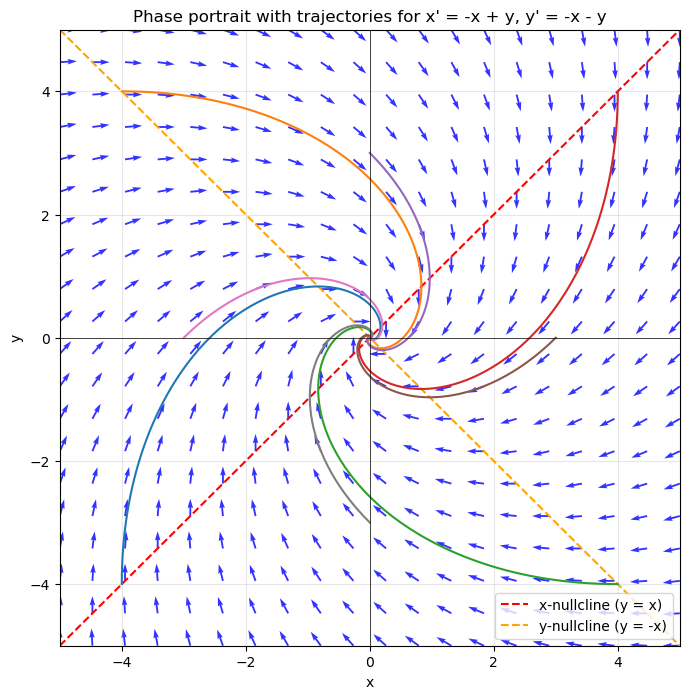

In [ ]:
def system(t, z):
    x, y = z
    dxdt = -x + y
    dydt = -x - y
    return [dxdt, dydt]

x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

U = -X + Y
V = -X - Y

magnitude = np.sqrt(U**2 + V**2)
U /= magnitude
V /= magnitude

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color='blue', alpha=0.8)

plt.plot(x, x, color='red', linestyle='--', label="x-nullcline (y = x)")
plt.plot(x, -x, color='orange', linestyle='--', label="y-nullcline (y = -x)")

initial_conditions = [(-4, -4), (-4, 4), (4, -4), (4, 4), (0, 3), (3, 0), (-3, 0), (0, -3)]
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

for x0, y0 in initial_conditions:
    sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1])

plt.title("Phase portrait with trajectories for x' = -x + y, y' = -x - y")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

## Linearization of Nonlinear Planar Systems

Suppose we have a (possibly nonlinear) autonomous system of equations, 

$$
\begin{cases}
x'(t) = P(x(t), y(t)), \; t \in \mathbb{R}, \\
y'(t) = Q(x(t), y(t)), \; t \in \mathbb{R}.
\end{cases}
$$

The critical points of this system correspond to points $(x_0, y_0)$ such that 

$$
\begin{cases}
P(x_0, y_0) = 0, \\
Q(x_0, y_0) = 0.
\end{cases}
$$

In general, we cannot find an explicit solution formula for the trajectory $\boldsymbol{X}(t)$, so to study the stability of these critical points, we need to introduce new ideas.

Here we introduce the method of *linearization*. The idea is to approximate the nonlinear system by a linear system (which we know how to analyze) and to see if the stability analysis for the linear system can tell us something about the stability of critical points for the nonlinear system.

Recall that from calculus, one can approximate a differentiable function $f: I \to \mathbb{R}$ around a point $a \in I$ via *linear approximation*:

$$
f(x) \approx f(a) + f'(a) (x - a) \; \text{for} \; x \; \text{sufficiently close to} \; a.
$$

One can use Taylor's remainder theorem to quantify the error in this approximation.

The two-dimensional analogue of this is 

$$
f(x, y) \approx f(x_0, y_0) + \partial_x f(x_0, y_0) (x - x_0) + \partial_y f(x_0, y_0) (y - y_0), \; \text{for} \; (x, y) \; \text{sufficiently close to} \; (x_0, y_0).
$$

A higher dimensional version of Taylor's theorem exists and can be used to quantify the error in this approximation. So if $(x_0, y_0)$ is a critical point, we can approximate 

$$
P(x, y) \approx P(x_0, y_0) + \partial_x P(x_0, y_0) (x - x_0) + \partial_y P(x_0, y_0) (y - y_0),
$$

$$
Q(x, y) \approx Q(x_0, y_0) + \partial_x Q(x_0, y_0) (x - x_0) + \partial_y Q(x_0, y_0) (y - y_0),
$$
for $(x, y)$ sufficiently close to $(x_0, y_0)$. Since $(x_0, y_0)$ is a critical point, we have $P(x_0, y_0) = Q(x_0, y_0) = 0$. So near the critical point, we have 

$$
\begin{cases}
x'(t) \approx \partial_x P(x_0, y_0) (x - x_0) + \partial_y P(x_0, y_0) (y - y_0), \; t \in \mathbb{R}, \\
y'(t) \approx \partial_x Q(x_0, y_0) (x - x_0) + \partial_y Q(x_0, y_0) (y - y_0), \; t \in \mathbb{R}.
\end{cases}
$$

This can be written in matrix form as 

$$
\boldsymbol{X}'(t) = A (\boldsymbol{X}(t) - \boldsymbol{X}_0), \; t \in \mathbb{R},
$$

where 

$$
A = \begin{pmatrix}
\partial_x P(x_0, y_0) & \partial_y P(x_0, y_0) \\
\partial_x Q(x_0, y_0) & \partial_y Q(x_0, y_0)
\end{pmatrix}.
$$

This is what we refer to as the *linearization* of the nonlinear system around the critical point $\boldsymbol{X}_0$.

It turns out that in certain situations, the eigenvalues of this matrix $A$ can determine the stability of the critical point $(x_0, y_0)$ (for the nonlinear system). Famous results in this direction include the [Hartman-Grobman theorem](https://en.wikipedia.org/wiki/Hartman–Grobman_theorem) and the [Stable Manifold Theorem](https://en.wikipedia.org/wiki/Stable_manifold_theorem). 

Below we provide a summary of the important cases.

> **Theorem**  
> Let $\boldsymbol{X}_0$ be a critical point to the planar autonomous system $\boldsymbol{X}'(t) = \boldsymbol{f}(\boldsymbol{X}(t)), \; t \in \mathbb{R}$.  
> - If all the eigenvalues of $A$ have negative real parts, then $\boldsymbol{X}_0$ is an asymptotically stable critical point.  
> - If one of the eigenvalues of $A$ has a positive real part, then $\boldsymbol{X}_0$ is an unstable critical point.  

If the eigenvalues of $A$ are purely imaginary, we'll need other tools to determine the stability of $\boldsymbol{X}_0$. Famous results in this direction include the so-called [Center manifold theorems](https://en.wikipedia.org/wiki/Center_manifold).

In certain situations, one can also adopt a similar classification for the critical point $\boldsymbol{X}_0$.

> **Theorem**  
> If $\boldsymbol{X}_0$ is a stable node, stable spiral point, unstable spiral point, unstable node, or a saddle point **for the linear system**, then we adopt the same classification system for the nonlinear system. The trajectories for the nonlinear system will have the same general geometric features as the trajectories of the linear system (at least locally, in a small neighborhood of the critical point).  

Otherwise, we'll need more tools to identify the geometric features of the trajectories. This includes the case when the eigenvalues of $A$ are purely imaginary.

> **Example**  
> Consider the system of differential equations  
> $$
> \begin{cases}
> x'(t) = y(t) - (x(t))^2, \; t \in \mathbb{R}, \\
> y'(t) = x(t) - (y(t))^2, \; t \in \mathbb{R}.
> \end{cases}
> $$  
> To identify the critical points, we set $x'(t) = y(t) - x(t)^2 = 0$ and $y'(t) = x(t) - y(t)^2 = 0$. One can easily show that $x = 0, y = 0$ and $x = 1, y = 1$ are the only solutions to this system. Therefore, the system admits two critical points: $(0, 0)$ and $(1, 1)$.
>
 <div style="text-align: center;">
     <img src="./diagrams/linearization.png" alt="Phase portrait" style="width: 33%;">
 </div>

> To study the stability of the critical points, we first seek to linearize the system. The linearization of the system is the linear system $\boldsymbol{X}'(t) = A (\boldsymbol{X}(t) - \boldsymbol{X}_0), \; t \in \mathbb{R}$, where  
> $$
> A = \begin{pmatrix}
> -2x & 1 \\
> 1 & -2y
> \end{pmatrix}.
> $$
> If $\boldsymbol{X}_0 = (0, 0)$, then the matrix $A$ is  
> $$
> A = \begin{pmatrix}
> 0 & 1 \\
> 1 & 0
> \end{pmatrix}.
> $$  
> The eigenvalues of $A$ are $\lambda_1 = -1, \lambda_2 = 1$. This means that the critical point $\boldsymbol{X}_0 = (0, 0)$ is *unstable* (as a critical point for the nonlinear system), and following the classification for linear systems, we classify it as a *saddle point*.
> If $\boldsymbol{X}_0 = (1, 1)$, then the matrix $A$ is  
> $$
> A = \begin{pmatrix}
> -2 & 1 \\
> 1 & -2
> \end{pmatrix}.
> $$  
> The eigenvalues of $A$ are $\lambda_1 = -3, \lambda_2 = -1$. This means that the critical point $\boldsymbol{X}_0 = (1, 1)$ is *asymptotically stable*, and following the classification for linear systems, we classify it as a *stable node*.

**Remark:**  Linearization is also an important technique for studying nonlinear partial differential equations, but for PDEs the situation is a lot more complicated. 



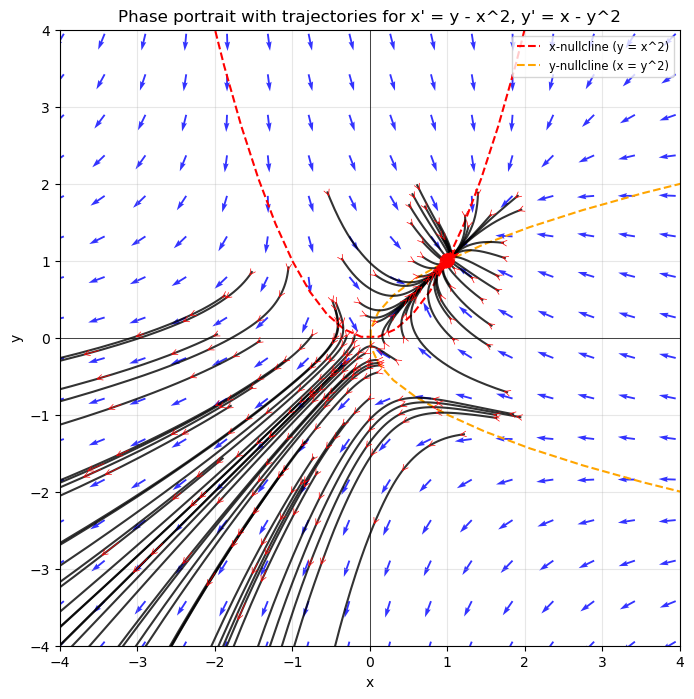

In [ ]:
def system(t, z):
    x, y = z
    dxdt = y - x**2
    dydt = x - y**2
    return [dxdt, dydt]

x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

U = Y - X**2
V = X - Y**2

magnitude = np.sqrt(U**2 + V**2)
U /= magnitude
V /= magnitude

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color='blue', alpha=0.8)

x_vals = np.linspace(-2.1, 2.1, 20)
plt.plot(x_vals, x_vals**2, color='red', linestyle='--', label="x-nullcline (y = x^2)")
y_vals = np.linspace(-2.1, 2.1, 20)
plt.plot(y_vals**2, y_vals, color='orange', linestyle='--', label="y-nullcline (x = y^2)")

np.random.seed(42)
initial_conditions = [(np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5)) for _ in range(20)] + \
                     [(np.random.uniform(0.5, 2), np.random.uniform(0.5, 2)) for _ in range(20)] + \
                     [(np.random.uniform(-2, 2), np.random.uniform(-2, 2)) for _ in range(40)]
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

for x0, y0 in initial_conditions:
    sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], color='black', alpha=0.8)
    for i in range(0, len(sol.t) - 1, max(1, len(sol.t) // 5)): 
        plt.annotate('', xy=(sol.y[0][i + 1], sol.y[1][i + 1]), xytext=(sol.y[0][i], sol.y[1][i]),
                     arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

plt.title("Phase portrait with trajectories for x' = y - x^2, y' = x - y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(alpha=0.3)
plt.legend(loc='upper right', fontsize='small')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

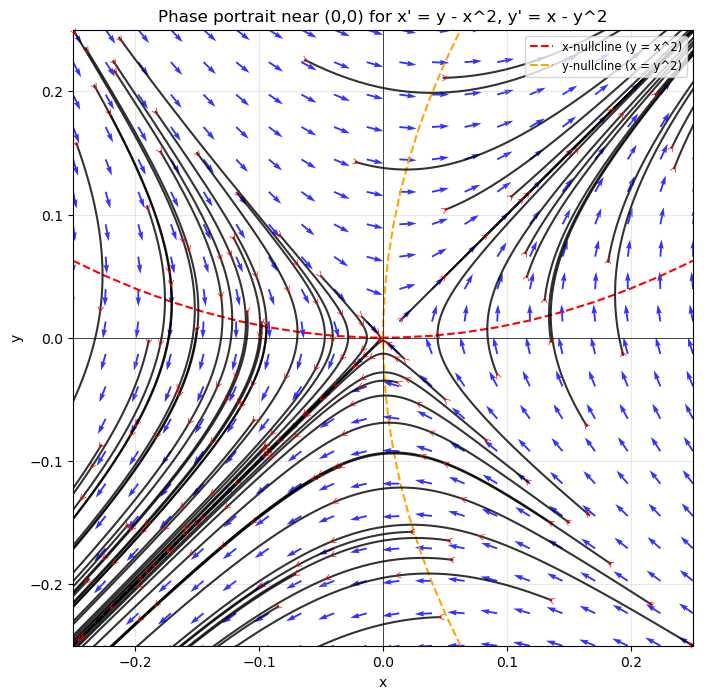

In [53]:
x = np.linspace(-0.25, 0.25, 20)
y = np.linspace(-0.25, 0.25, 20)
X, Y = np.meshgrid(x, y)

U = Y - X**2
V = X - Y**2

magnitude = np.sqrt(U**2 + V**2)
U /= magnitude
V /= magnitude

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color='blue', alpha=0.8)

x_vals = np.linspace(-0.25, 0.25, 20)
plt.plot(x_vals, x_vals**2, color='red', linestyle='--', label="x-nullcline (y = x^2)")
y_vals = np.linspace(-0.25, 0.25, 20)
plt.plot(y_vals**2, y_vals, color='orange', linestyle='--', label="y-nullcline (x = y^2)")

np.random.seed(42)
initial_conditions = [(np.random.uniform(-0.25, 0.25), np.random.uniform(-0.25, 0.25)) for _ in range(50)] + \
                     [(i, i) for i in np.linspace(-0.25, 0.25, 16)] + \
                     [(i, -i) for i in np.linspace(-0.25, 0.25, 16)]
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

for x0, y0 in initial_conditions:
    sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], color='black', alpha=0.8)
    for i in range(0, len(sol.t) - 1, max(1, len(sol.t) // 5)): 
        plt.annotate('', xy=(sol.y[0][i + 1], sol.y[1][i + 1]), xytext=(sol.y[0][i], sol.y[1][i]),
                     arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

plt.title("Phase portrait near (0,0) for x' = y - x^2, y' = x - y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(alpha=0.3)
plt.legend(loc='upper right', fontsize='small')
plt.xlim(-0.25, 0.25)  
plt.ylim(-0.25, 0.25) 
plt.show()


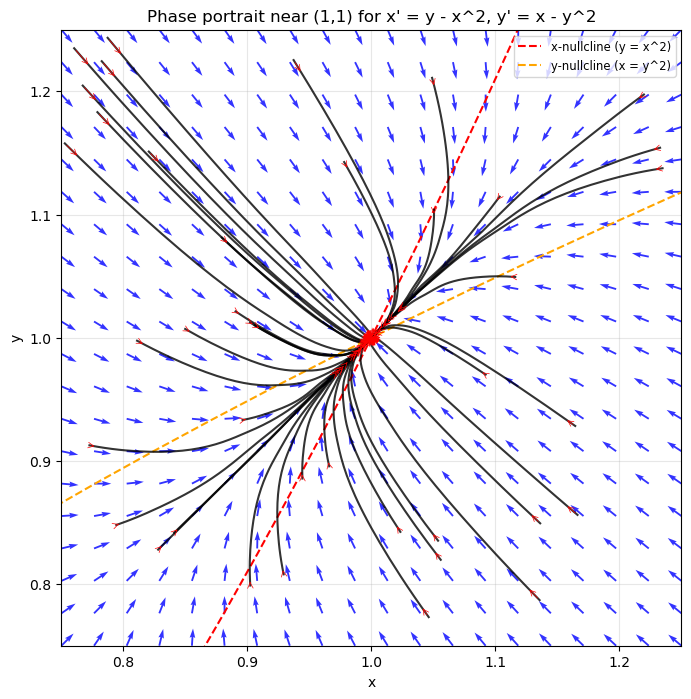

In [51]:
x = np.linspace(0.75, 1.25, 20)
y = np.linspace(0.75, 1.25, 20)
X, Y = np.meshgrid(x, y)

U = Y - X**2
V = X - Y**2

magnitude = np.sqrt(U**2 + V**2)
U /= magnitude
V /= magnitude

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color='blue', alpha=0.8)

x_vals = np.linspace(0.75, 1.25, 20)
plt.plot(x_vals, x_vals**2, color='red', linestyle='--', label="x-nullcline (y = x^2)")
y_vals = np.linspace(0.75, 1.25, 20)
plt.plot(y_vals**2, y_vals, color='orange', linestyle='--', label="y-nullcline (x = y^2)")

np.random.seed(42)
initial_conditions = [(np.random.uniform(0.75, 1.25), np.random.uniform(0.75, 1.25)) for _ in range(40)] 
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

for x0, y0 in initial_conditions:
    sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], color='black', alpha=0.8)
    for i in range(0, len(sol.t) - 1, max(1, len(sol.t) // 5)): 
        plt.annotate('', xy=(sol.y[0][i + 1], sol.y[1][i + 1]), xytext=(sol.y[0][i], sol.y[1][i]),
                     arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

plt.title("Phase portrait near (1,1) for x' = y - x^2, y' = x - y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(alpha=0.3)
plt.legend(loc='upper right', fontsize='small')
plt.xlim(0.75, 1.25)  
plt.ylim(0.75, 1.25) 
plt.show()
